# <center>Tato studijní pomůcka vznikla za podpory Inovačního projektu FSv ČVUT č. 15 "Inovativní pomůcky pro předměty Přetváření a porušování materiálů".</center>
<center>(c) 2024 Lenka Dohnalová <i>(lenka.dohnalova@fsv.cvut.cz)</i>, Petr Havlásek <i>(petr.havlasek@cvut.cz)</i>, Milan Jirásek <i>(milan.jirasek@cvut.cz)</i></center>

***
# Výpočet průhybu na viskoelastické konzole

## Zadání
Nosník na obrázku je vyroben z betonu, který budeme v tomto příkladu považovat za lineárně viskoelastický materiál se stárnutím. Průřez má šířku 300 mm a výšku 200 mm, osamělý moment $M_s$ o velikosti 20 kNm začne působit od stáří 14 dní.

Spočítejte hodnotu průhybu levého konce konzoly ve stáří 28 dní.  

Při výpočtu můžete využít vhodnou funkci poddajnosti, známé hodnoty jsou tyto:  
$J(14^+, 14) = 40 MPa^{-1}$  
$J(14, 28) = 0 MPa^{-1}$  
$J(28+, 14) = 60 MPa^{-1}$  
$J(28^+, 28) = 30 MPa^{-1}$  


(Zatížení vlastní tíhou a vliv stlačení nebo protažení střednice zanedbejte.)


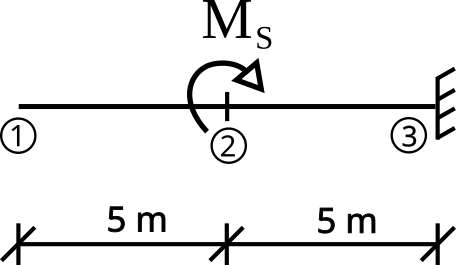

In [7]:
from IPython.display import display, Image
display(Image(filename="Konzola_osamely_moment_zadani.png", width=300))

Import potřebných knihoven

In [8]:
%matplotlib inline

import math
import numpy as np

from IPython.display import Markdown as md

import matplotlib.pyplot as plt

#!pip install sympy
from sympy import *
import sympy as smp

import matplotlib.patches as patches


## Řešení

Vykreslíme průběh momentů od zatížení ($M$) a od jednotlové síly v místě počítaného průhybu ($\overline M$). Vykreslení je v jednotkách kNm.

Integrací průběhů momentů vyjádříme průhyb pro výpočet podle pružnosti a následně s využitím vhodné funkce poddajnosti upravíme na viskoelastické řešení.

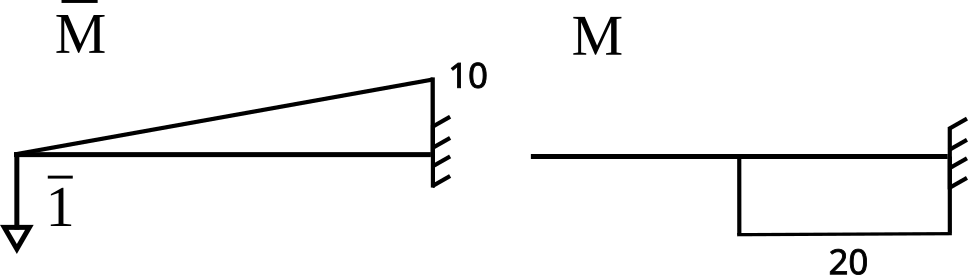

In [9]:
from IPython.display import display, Image
display(Image(filename="Konzola_osamely_moment_reseni.png", width=500))

**Definice proměnných**

In [10]:
w1_el = smp.symbols(r'\overline{w_1}', real = True)
w1 = smp.symbols(r'w_1', real = True)
x = smp.symbols('x', real = True)

t = smp.symbols('t', real = True, positive = True)
tt = smp.symbols('tt', real = True, positive = True)

I = smp.symbols('I', real = True, positive = True)
E = smp.symbols('E', real = True, positive = True)

J = smp.Function('J') # Definice J jako funkce
b = smp.symbols('b', real = True, positive = True)
h = smp.symbols('h', real = True, positive = True)


# hodnoty dle zadání:
val_b = 0.3
val_h = 0.2
val_J_28_14 = 60e-12  # 1/MPa


**Řešení podle pružnosti**


In [11]:
w1_el = 1/(E*I) * integrate(-20 * (5 + x), (x, 0, 5))

# Zjednodušení výsledku
simplified_w1_el = w1_el.simplify()

simplified_w1_el

I_expr = 1/12*b*h**3
val_I = I_expr.subs({b: val_b, h: val_h}).evalf()
print(f"Moment setrvačnosti: {val_I:.5f} m^4")

Moment setrvačnosti: 0.00020 m^4


**Řešení pro viskoelastický materiál**


In [12]:
# Substituce do výrazu w1_el
w1 = w1_el.subs({E: 1/val_J_28_14, I: val_I, b: val_b, h:val_h})

# Vyhodnocení výrazu
w1_28 = w1.evalf()

# Výpis výsledku
print(f"\033[1mPrůhyb konce konzoly ve stáří 28 dní je {w1_28*1000:.3f} mm.\033[0m")


Průhyb konce konzoly ve stáří 28 dní je -0.225 mm.
